In [ ]:
#!unzip -uq "/content/drive/My Drive/colab/cho meo/archive.zip" -d "/content/drive/My Drive/colab/cho meo/"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
import os

In [3]:
datagen = ImageDataGenerator(rescale=1./255.)

train_data = datagen.flow_from_directory('/content/drive/MyDrive/colab/cho_meo/training_set/training_set', target_size=(224,224), batch_size=32)
test_data = datagen.flow_from_directory('/content/drive/MyDrive/colab/cho_meo/test_set/test_set', target_size=(224,224), batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [15]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

# Dong bang cac layer
for layer in model_vgg16_conv.layers:
    layer.trainable = False

# Tao model
input = Input(shape=(224, 224, 3), name='image_input')
output_vgg16_conv = model_vgg16_conv(input)

# Them cac layer FC va Dropout
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(1024, activation='relu', name='fc1')(x)
# x = Dropout(0.5)(x)
x = Dense(512, activation='relu', name='fc2')(x)
# x = Dropout(0.5)(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax', name='predict')(x)

# Compile
my_model = Model(inputs=input, outputs=predictions)
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(os.path.join("/content/drive/MyDrive/colab/cho_meo/weights", filepath), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [16]:
H = my_model.fit(train_data,
              steps_per_epoch = train_data.samples // train_data.batch_size, 
              epochs=5,
              validation_data = test_data, 
              validation_steps=test_data.samples // test_data.batch_size)
my_model.save('/content/drive/MyDrive/colab/cho_meo/cho_meo.h5')

Epoch 1/5
250/250 [==============================] - 1197s 5s/step - loss: 0.3708 - accuracy: 0.8510 - val_loss: 0.2215 - val_accuracy: 0.8983
Epoch 2/5
250/250 [==============================] - 96s 382ms/step - loss: 0.1830 - accuracy: 0.9263 - val_loss: 0.2136 - val_accuracy: 0.9132
Epoch 3/5
250/250 [==============================] - 95s 381ms/step - loss: 0.1308 - accuracy: 0.9485 - val_loss: 0.2427 - val_accuracy: 0.9162
Epoch 4/5
250/250 [==============================] - 95s 381ms/step - loss: 0.0940 - accuracy: 0.9641 - val_loss: 0.2796 - val_accuracy: 0.8859
Epoch 5/5
250/250 [==============================] - 96s 382ms/step - loss: 0.0686 - accuracy: 0.9743 - val_loss: 0.2467 - val_accuracy: 0.9152


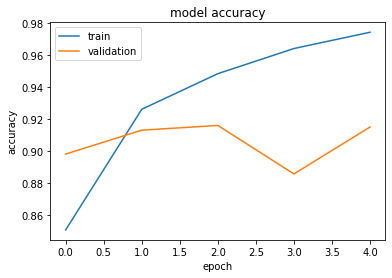

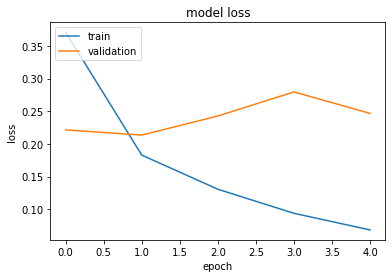

In [17]:
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[[1. 0.]]
This picture is:  cat [1. 0.]
Accuracy 100.0


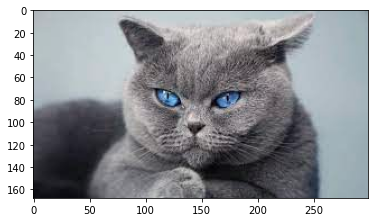

In [18]:
# test model
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

class_name = ['cat', 'dog']

model = load_model('/content/drive/MyDrive/colab/cho_meo/cho_meo.h5')

img = cv2.imread('/content/drive/MyDrive/colab/cho_meo/neo2.jpg')
plt.imshow(img)
img = cv2.resize(img, dsize= (224,224))
img = np.expand_dims(img, axis=0)
predict = model.predict(img)
print(predict)
print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
print('Accuracy', np.max(predict[0] * 100, axis=0))